In [21]:
import pandas as pd
df = pd.read_csv('iris.csv')
df = df.drop(df.columns[-1], axis=1)
df.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
import random
random.seed(0)
train_idx = random.sample(range(150), 75)
val_idx = [x for x in range(150) if x not in train_idx]
train_df = df.iloc[train_idx]
val_df = df.iloc[val_idx]

In [45]:
from sklearn.mixture import GaussianMixture
import numpy as np

np.random.seed(0)
scores = []
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(train_df)
    train_score = gmm.score(train_df)
    val_score = gmm.score(val_df)
    scores.append((k, train_score, val_score))
    print(k, train_score, val_score)

1 -2.529536131881066 -2.6396913964349644
2 -1.2974016622621896 -1.920529668840818
3 -0.906918601222861 -2.1752441053059446
4 -0.7875173165867178 -2.362411177072842
5 -0.6290508432715435 -2.7034708632606232
6 -0.07788400664286982 -3.6761170918147377
7 0.45937333881996 -5.55929318832744
8 0.44163096989678297 -4.6838257819416365
9 0.3095412536343553 -5.177351575495724
10 1.56497892153561 -10.07020835800707


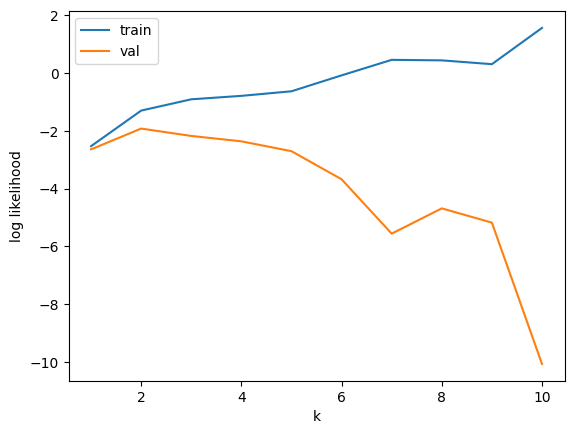

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(scores, columns=['k', 'train_score', 'val_score'])
sns.lineplot(data=df, x='k', y='train_score', label='train')
sns.lineplot(data=df, x='k', y='val_score', label='val')
plt.ylabel('log likelihood')
plt.show()